<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Assignment 1: Visualisation for Network Traffic Analysis (2022)
---

The completion of this worksheet is worth a **maximum of 20 marks** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Brief
---

You have been asked to examine a sample of network traffic to investigate suspicious activity on some of the company workstations. The company directors need to be able to understand this data. Your task is to **produce a series of different visual representations to describe and understand the characteristics of the data, based on the task questions below**. You should use the [Matplotlib documentation](https://matplotlib.org/stable/api/index.html) and the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) to learn about the library functionality, as well as other online resources. 

### Assessment and Marking
---

For each question you will see the maximum number of marks you may be awarded for a complete answer in brackets.

* **Task 1:** Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Number of Packets" sent on the y-axis. (3)
* **Task 2:** Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Packet Length" sent on the y-axis. (3)
* **Task 3:** Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis. (2)
* **Task 4:** Display a Scatter Chart that shows the association between Source and Destination data. (2)
* **Task 5:** Filter the data so that only 10.x.x.x Source addresses are included in a new DataFrame. (1)
* **(Advanced) Task 6:** Display a Node Link Diagram for this new DataFrame. (3)
* **(Advanced) Task 7:** For each Protocol type contained in this Dataframe, create a new Column and assign whether the Protocol usage is True or False. (3)
* **(Advanced) Task 8:** Show a Multi-Line Chart that shows the Total Packet Length Per Protocol. (3)

This assignment should be submitted as as PDF to your Blackboard portfolio submission as per the instructions in the assignment specification available on Blackboard. A copy of your work should also be provided via a UWE Gitlab repository, with an accessible link provided with your portfolio.
 
### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---

In [1]:
### Load in the libraries and the data
!pip install networkx

import pandas as pd
import matplotlib.pyplot as plt
#import networkx as nx
import seaborn as sns

# The following line is useful before each plot to increase the default size that it is rendered at:
# plt.figure(figsize=(20,10))

data = pd.read_csv('./T1_data/2022-task1_data.csv')
data

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.10.5.11,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."
1,2,0.000050,10.10.5.10,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0
2,3,0.000240,10.10.5.10,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5..."
3,4,0.186710,10.10.5.11,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...
4,5,1.119689,10.10.5.14,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."
...,...,...,...,...,...,...,...
34465,34466,819.314740,PcsCompu_03:cb:a5,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.12
34466,34467,820.066244,PcsCompu_60:73:28,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.11
34467,34468,820.146617,PcsCompu_90:18:5a,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.14
34468,34469,820.224071,PcsCompu_c8:46:cd,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.13


### Task 1: Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Number of Packets" sent on the y-axis. (3)

*Hint: The Time column could be grouped by minute by changing the precision of how time is measured.*

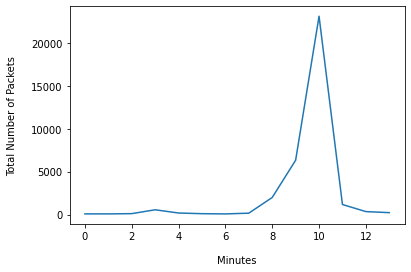

In [2]:
# ANSWER
# importing the required module
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
  
data = pd.read_csv('./T1_data/2022-task1_data.csv')

data['Minutes']= data['Time'].astype(int)/60
data['Minutes']=data['Minutes'].astype(int)
# new_data = data.groupby(by=['Minutes'],sort=False)
plt.plot(data['Minutes'].value_counts().sort_index())

plt.xlabel("Minutes", labelpad=14)
plt.ylabel("Total Number of Packets", labelpad=14)

plt.show()


### Task 2: Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Packet Length" sent on the y-axis. (3)

*Hint: Group you data by "Time" and then you can take the sum of the Length column.*

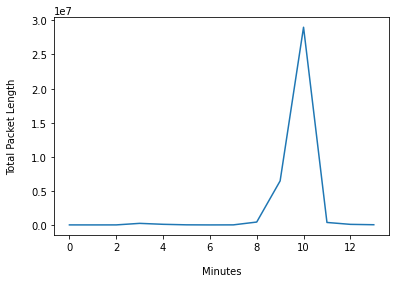

In [3]:
# ANSWER
# importing the required module
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as mp

  
data = pd.read_csv('./T1_data/2022-task1_data.csv')

data['Minutes']= data['Time'].astype(int)/60
data['Minutes']=data['Minutes'].astype(int)

data2= data.groupby(by=['Minutes']).sum()
#print(data.groupby(by=['Minutes']).sum())
mp.plot(data2['Length'])
plt.xlabel("Minutes", labelpad=14)
plt.ylabel("Total Packet Length", labelpad=14)
mp.show()

### Task 3: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis. (2)

*Hint: Search the pandas documentation for creating a Bar Chart from a DataFrame column.*

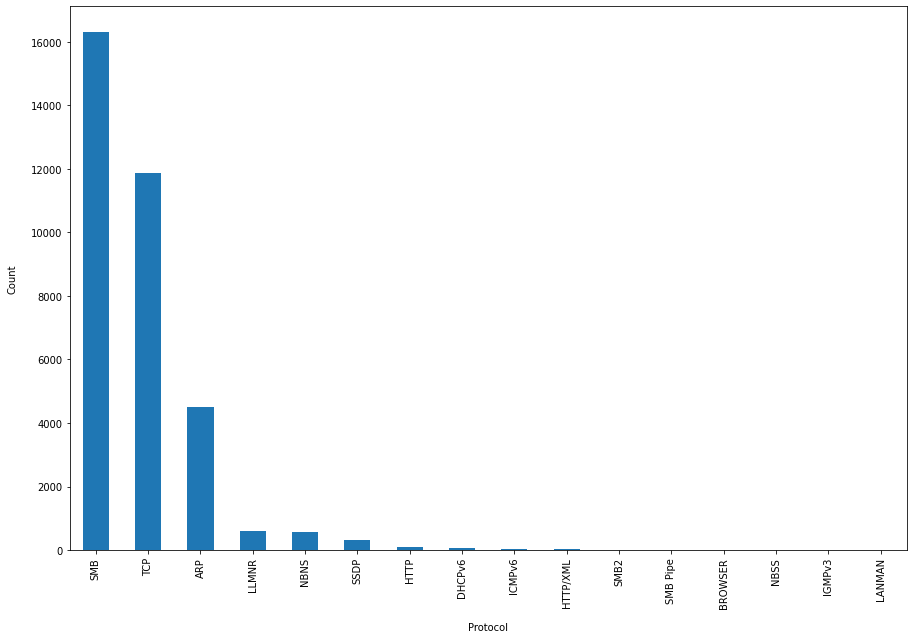

In [4]:
# ANSWER
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv('./T1_data/2022-task1_data.csv')
plt.xlabel("Protocol", labelpad=14)
plt.ylabel("Count", labelpad=14)
data['Protocol'].value_counts().plot(kind='bar',figsize=(15, 10));

### Task 4: Display a Scatter Chart that shows the association between Source and Destination data. (2)

*Hint: Matplotlib has a scatterplot function that takes ***x*** and ***y*** as inputs*

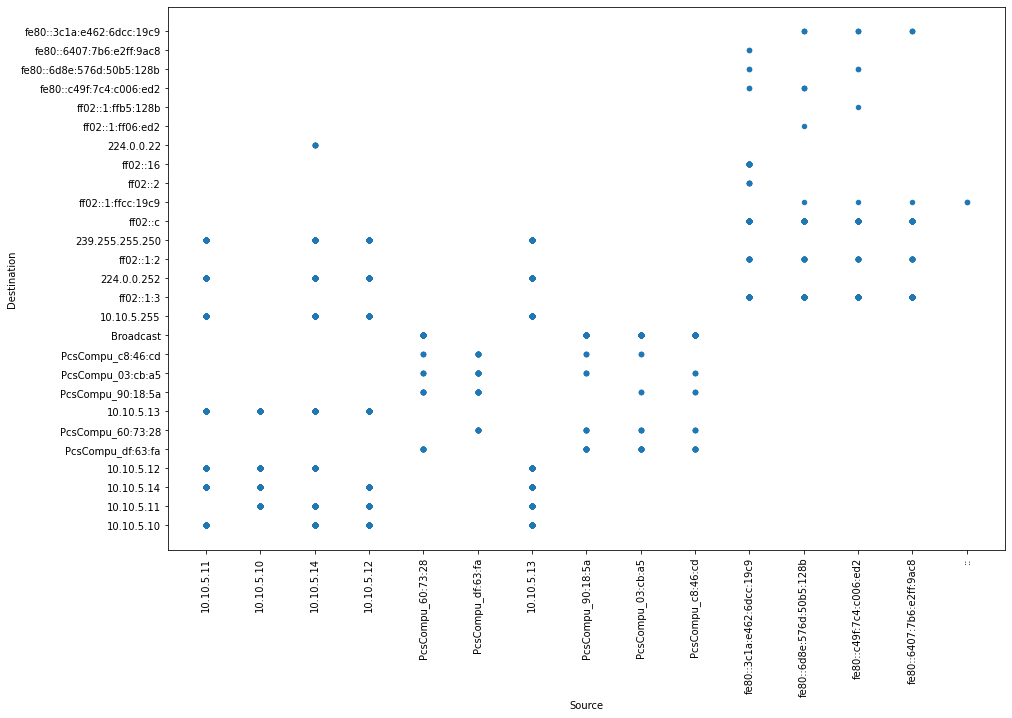

In [5]:
### ANSWER
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv('./T1_data/2022-task1_data.csv')

data.plot.scatter(x = 'Source',  y = 'Destination',figsize=(15,10));
plt.xticks(rotation = 90)

plt.show()

### Task 5: Filter the data so that only 10.x.x.x Source addresses are included in a new DataFrame. (1)

*Hint: Retrieve all rows where the Source string starts with 10.*

In [6]:
# ANSWER

# importing the required module
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
  

data2= data[data['Source'].str.startswith("10.")]
data2

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.10.5.11,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."
1,2,0.000050,10.10.5.10,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0
2,3,0.000240,10.10.5.10,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5..."
3,4,0.186710,10.10.5.11,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...
4,5,1.119689,10.10.5.14,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."
...,...,...,...,...,...,...,...
34455,34456,818.104499,10.10.5.13,10.10.5.10,TCP,8214,"49196 > 1293 [PSH, ACK] Seq=298831 Ack=811 W..."
34456,34457,818.104531,10.10.5.10,10.10.5.13,TCP,54,1293 > 49196 [ACK] Seq=811 Ack=306991 Win=43...
34457,34458,818.104875,10.10.5.10,10.10.5.13,TCP,69,"1293 > 49196 [PSH, ACK] Seq=811 Ack=306991 W..."
34460,34461,818.294131,10.10.5.13,10.10.5.10,TCP,60,49196 > 1293 [ACK] Seq=306991 Ack=826 Win=25...


### (Advanced) Task 6: Display a Node Link Diagram for this new DataFrame. (3)

*Hint: Look at the NetworkX library: https://networkx.org/ and the online course notes.*

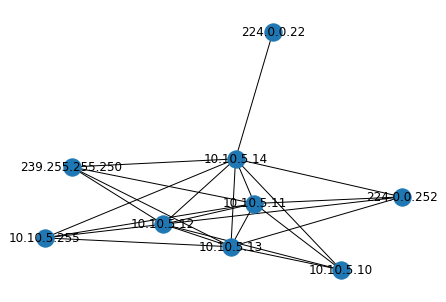

In [7]:
# ANSWER

# importing the required module
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx
  


G = nx.from_pandas_edgelist(data2, 
                            source='Source',
                            target = 'Destination'
                           )


nx.draw(G, with_labels=True)
plt.draw()
plt.show()

### (Advanced) Task 7: For each Protocol type contained in this Dataframe, create a new Column and assign whether the Protocol usage is True or False (3)

*Hint: Get a list of unique protocol values, assign each value to be a new column where the Protocol column is equal to the Protocol name.*



In [8]:
# ANSWER 

#New Column to store the usage of True or False
data['TCP Usage'] = False
data['LLMNR Usage'] = False
data['SMB Usage'] = False
data['SMB2 Usage'] = False

data['NBNS Usage'] = False
data['NBSS Usage'] = False
data['SSDP Usage'] = False
data['HTTP Usage'] = False

data['DHCPv6 Usage'] = False
data['ICMPv6 Usage'] = False
data['IGMPv3 Usage'] = False
data['ARP Usage'] = False

data['HTTP/XML Usage'] = False
data['BROWSER Usage'] = False
data['SMB Pipe Usage'] = False
data['LANMAN Usage'] = False

#A function to check a specific protocol usage is true or false
def set_usage(row):
    if row['Protocol'] == 'TCP':
        row['TCP Usage'] = True
        
    elif row['Protocol'] == 'LLMNR':
          row['LLMNR Usage'] = True
            
    elif row['Protocol'] == 'SMB':
          row['SMB Usage'] = True
            
    elif row['Protocol'] == 'SMB2':
          row['SMB2 Usage'] = True
            
    elif row['Protocol'] == 'NBNS':
          row['NBNS Usage'] = True
            
    elif row['Protocol'] == 'NBSS':
          row['NBSS Usage'] = True
            
    elif row['Protocol'] == 'SSDP':
          row['SSDP Usage'] = True
            
    elif row['Protocol'] == 'HTTP':
          row['HTTP Usage'] = True
            
    elif row['Protocol'] == 'DHCPv6':
          row['DHCPv6 Usage'] = True
            
    elif row['Protocol'] == 'ICMPv6':
          row['ICMPv6 Usage'] = True
            
    elif row['Protocol'] == 'IGMPv3':
          row['IGMPv3 Usage'] = True
            
    elif row['Protocol'] == 'ARP':
          row['ARP Usage'] = True
            
    elif row['Protocol'] == 'HTTP/XML':
          row['HTTP/XML Usage'] = True
            
    elif row['Protocol'] == 'BROWSER':
          row['BROWSER Usage'] = True
            
    elif row['Protocol'] == 'SMB Pipe':
          row['SMB Pipe Usage'] = True
            
    elif row['Protocol'] == 'LANMAN':
          row['LANMAN Usage'] = True
            
    return row


#print(data['Protocol'].unique())

# Apply the function to set each row's boolean value
data = data.apply(set_usage, axis=1)

#data
data.loc[data['SMB Usage'] == True]

#data


,No.,Time,Source,Destination,Protocol,Length,Info,TCP Usage,LLMNR Usage,SMB Usage,...,SSDP Usage,HTTP Usage,DHCPv6 Usage,ICMPv6 Usage,IGMPv3 Usage,ARP Usage,HTTP/XML Usage,BROWSER Usage,SMB Pipe Usage,LANMAN Usage
1413,1414,491.045115,10.10.5.11,10.10.5.12,SMB,142,Negotiate Protocol Request,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1414,1415,491.055208,10.10.5.12,10.10.5.11,SMB,185,Negotiate Protocol Response,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1415,1416,491.055300,10.10.5.11,10.10.5.12,SMB,157,"Session Setup AndX Request, User: .\\",False,False,True,...,False,False,False,False,False,False,False,False,False,False
1416,1417,491.055798,10.10.5.12,10.10.5.11,SMB,179,Session Setup AndX Response,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1417,1418,491.055914,10.10.5.11,10.10.5.12,SMB,149,"Tree Connect AndX Request, Path: \\\\10.10.5.1...",False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32219,32220,647.618617,10.10.5.14,10.10.5.13,SMB,93,"Trans2 Response<unknown>, Error: STATUS_NOT_IM...",False,False,True,...,False,False,False,False,False,False,False,False,False,False
32220,32221,647.618870,10.10.5.13,10.10.5.14,SMB,4232,"Trans2 Request, SESSION_SETUP",False,False,True,...,False,False,False,False,False,False,False,False,False,False
32222,32223,647.618952,10.10.5.14,10.10.5.13,SMB,93,"Trans2 Response<unknown>, Error: STATUS_NOT_IM...",False,False,True,...,False,False,False,False,False,False,False,False,False,False
32223,32224,647.619255,10.10.5.13,10.10.5.14,SMB,4232,"Trans2 Request, SESSION_SETUP",False,False,True,...,False,False,False,False,False,False,False,False,False,False


### (Advanced) Task 8: Show a Multi-Line Chart that shows the Total Packet Length Per Protocol. (3)

*Hint: Think about how you did this in Task 1 and Task 2, and recall that plt.plot can be used to append to a plot.*

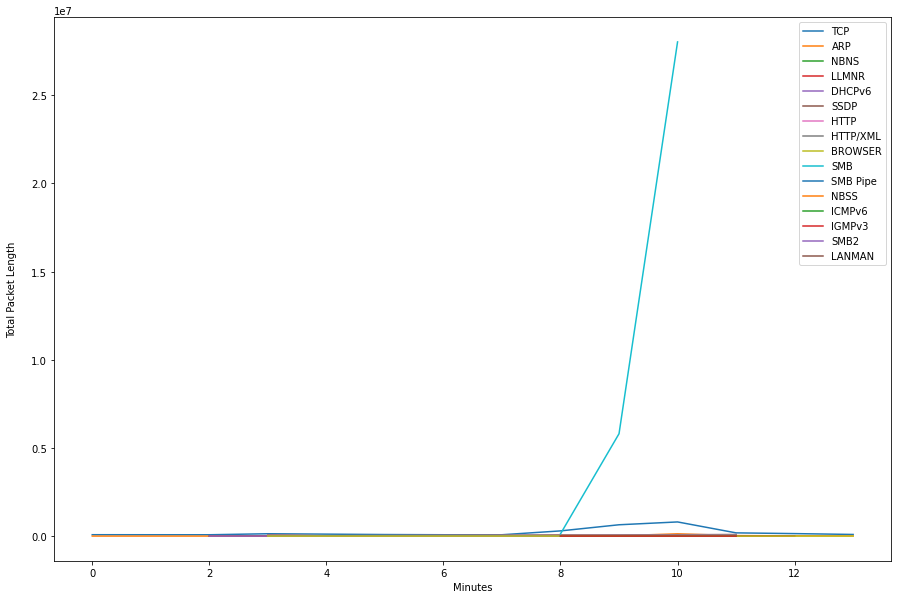

In [9]:
# ANSWER
import matplotlib.pyplot as plt
import pandas as pd



# Extract the TCP, ARP, and UDP usage data
data['Protocol'].unique()

# Extract the time data
data['Minutes']= data['Time'].astype(int)/60
data['Minutes']=data['Minutes'].astype(int)
time = data['Minutes']

#TCP packet length dataframe
tcp_df = data[data['Protocol'] == 'TCP']
tcp_lensum = tcp_df.groupby('Minutes')['Length'].sum()
#print(tcp_lensum)

#ARP packet length
arp_df = data[data['Protocol'] == 'ARP']
arp_lensum = arp_df.groupby('Minutes')['Length'].sum()

#NBNS packet length
nbns_df = data[data['Protocol'] == 'NBNS']
nbns_lensum = nbns_df.groupby('Minutes')['Length'].sum()

#LLMNR packet length
llmnr_df = data[data['Protocol'] == 'LLMNR']
llmnr_lensum = llmnr_df.groupby('Minutes')['Length'].sum()

#DHCPv6 packet length
dhcp_df = data[data['Protocol'] == 'DHCPv6']
dhcp_lensum = dhcp_df.groupby('Minutes')['Length'].sum()

#SSDP packet length
ssdp_df = data[data['Protocol'] == 'SSDP']
ssdp_lensum = ssdp_df.groupby('Minutes')['Length'].sum()

#HTTP packet length
http_df = data[data['Protocol'] == 'HTTP']
http_lensum = http_df.groupby('Minutes')['Length'].sum()

#HTTP/XML packet length
hxml_df = data[data['Protocol'] == 'HTTP/XML']
hxml_lensum = hxml_df.groupby('Minutes')['Length'].sum()

#BROWSER packet length
browser_df = data[data['Protocol'] == 'BROWSER']
browser_lensum = browser_df.groupby('Minutes')['Length'].sum()

#SMB packet length
smb_df = data[data['Protocol'] == 'SMB']
smb_lensum = smb_df.groupby('Minutes')['Length'].sum()

#SMB Pipe packet length
smbpipe_df = data[data['Protocol'] == 'SMB Pipe']
smbpipe_lensum = smbpipe_df.groupby('Minutes')['Length'].sum()

#NBSS packet length
nbss_df = data[data['Protocol'] == 'NBSS']
nbss_lensum = nbss_df.groupby('Minutes')['Length'].sum()

#ICMPv6 packet length
icmp_df = data[data['Protocol'] == 'ICMPv6']
icmp_lensum = icmp_df.groupby('Minutes')['Length'].sum()

#IGMPv3 packet length
igmp_df = data[data['Protocol'] == 'IGMPv3']
igmp_lensum = igmp_df.groupby('Minutes')['Length'].sum()

#SMB2 packet length
smb2_df = data[data['Protocol'] == 'SMB2']
smb2_lensum = smb2_df.groupby('Minutes')['Length'].sum()

#LANMAN packet length
lanman_df = data[data['Protocol'] == 'LANMAN']
lanman_lensum = lanman_df.groupby('Minutes')['Length'].sum()

#Plot the lines
tcp_lensum.plot(kind='line', x='time', y='packet_length',label = "TCP",figsize=(15, 10))
arp_lensum.plot(kind='line',label = "ARP")
nbns_lensum.plot(kind='line',label = "NBNS")
llmnr_lensum.plot(kind='line',label = "LLMNR")

dhcp_lensum.plot(kind='line',label = "DHCPv6")
ssdp_lensum.plot(kind='line',label = "SSDP")
http_lensum.plot(kind='line',label = "HTTP")
hxml_lensum.plot(kind='line',label = "HTTP/XML")

browser_lensum.plot(kind='line',label = "BROWSER")
smb_lensum.plot(kind='line',label = "SMB")
smbpipe_lensum.plot(kind='line',label = "SMB Pipe")
nbss_lensum.plot(kind='line',label = "NBSS")

icmp_lensum.plot(kind='line',label = "ICMPv6")
igmp_lensum.plot(kind='line',label = "IGMPv3")
smb2_lensum.plot(kind='line',label = "SMB2")
lanman_lensum.plot(kind='line',label = "LANMAN")

# Add a legend
plt.legend()

#Add a label for y axis
plt.ylabel("Total Packet Length", labelpad=14)

# Show the plot
plt.show()

In [10]:
data['Protocol'].unique()

array(['TCP', 'ARP', 'NBNS', 'LLMNR', 'DHCPv6', 'SSDP', 'HTTP',
       'HTTP/XML', 'BROWSER', 'SMB', 'SMB Pipe', 'NBSS', 'ICMPv6',
       'IGMPv3', 'SMB2', 'LANMAN'], dtype=object)